INDIAN CARSS DATA ANALYSIS

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

*MOUNTING DATA*

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*READING DATA*

In [7]:
df = pd.read_csv("/content/drive/MyDrive/PrepInsta_Wokerd/week 6/Indian Cars/cars_ds_final.csv",index_col=0)
df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*BASIC DATA EXPLORATION*

In [8]:
df.shape

(1276, 140)

In [9]:
df.isna().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

In [10]:
df.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=140)

In [11]:
df.columns = df.columns.str.lower()
df.columns

Index(['make', 'model', 'variant', 'ex-showroom_price', 'displacement',
       'cylinders', 'valves_per_cylinder', 'drivetrain',
       'cylinder_configuration', 'emission_norm',
       ...
       'leather_wrapped_steering', 'automatic_headlamps', 'engine_type',
       'asr_/_traction_control', 'cruise_control', 'usb_ports',
       'heads-up_display', 'welcome_lights', 'battery', 'electric_range'],
      dtype='object', length=140)

*DATA CEALNING*

In [12]:
new = df[['make','model','ex-showroom_price','body_type','displacement', 'cylinders', 'fuel_system', 'fuel_tank_capacity', 'fuel_type', 'city_mileage', 'seating_capacity','basic_warranty', 'child_safety_locks', 'number_of_airbags', 'parking_assistance', 'navigation_system']]

In [13]:
new.head()

,make,model,ex-showroom_price,body_type,displacement,cylinders,fuel_system,fuel_tank_capacity,fuel_type,city_mileage,seating_capacity,basic_warranty,child_safety_locks,number_of_airbags,parking_assistance,navigation_system
0,Tata,Nano Genx,"Rs. 2,92,667",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
1,Tata,Nano Genx,"Rs. 2,36,447",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
2,Tata,Nano Genx,"Rs. 2,96,661",Hatchback,624 cc,2.0,Injection,15 litres,CNG,NaN,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
3,Tata,Nano Genx,"Rs. 3,34,768",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
4,Tata,Nano Genx,"Rs. 2,72,223",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN


In [14]:
new.replace({"Maruti Suzuki R":"Maruti Suzuki","Land Rover Rover":"Land Rover"},inplace=True)

In [15]:
new["make"].value_counts()

Maruti Suzuki    163
Hyundai          130
Mahindra         119
Tata             100
Toyota            82
Honda             64
Skoda             43
Ford              43
Land Rover        37
Bmw               37
Renault           36
Volkswagen        34
Audi              31
Nissan            29
Jeep              28
Fiat              23
Jaguar            22
Kia               21
Volvo             18
Datsun            15
Porsche           14
Mg                13
Lamborghini       13
Icml              11
Mini              10
Lexus             10
Maserati           9
Ferrari            8
Mitsubishi         7
Bentley            6
Force              6
Premier            6
Isuzu              5
Aston Martin       3
Bugatti            2
Bajaj              2
Dc                 1
Name: make, dtype: int64

In [16]:
new["ex-showroom_price"]

0        Rs. 2,92,667
1        Rs. 2,36,447
2        Rs. 2,96,661
3        Rs. 3,34,768
4        Rs. 2,72,223
            ...      
1271    Rs. 13,02,000
1272    Rs. 14,21,000
1273    Rs. 14,31,000
1274    Rs. 12,01,000
1275    Rs. 68,62,560
Name: ex-showroom_price, Length: 1276, dtype: object

In [17]:
new["ex-showroom_price"]=new["ex-showroom_price"].str.replace("Rs. ","")
new["ex-showroom_price"]=new["ex-showroom_price"].str.replace(",","").astype(int)

In [18]:
new["ex-showroom_price"]

0        292667
1        236447
2        296661
3        334768
4        272223
         ...   
1271    1302000
1272    1421000
1273    1431000
1274    1201000
1275    6862560
Name: ex-showroom_price, Length: 1276, dtype: int64

In [19]:
new.isna().sum()

make                   75
model                   0
ex-showroom_price       0
body_type               6
displacement           12
cylinders              66
fuel_system             8
fuel_tank_capacity     69
fuel_type               0
city_mileage          555
seating_capacity        6
basic_warranty        440
child_safety_locks     75
number_of_airbags     135
parking_assistance    290
navigation_system     593
dtype: int64

In [20]:
new["displacement"].fillna("0", inplace=True)
new["fuel_tank_capacity"].fillna("0", inplace=True)
new["city_mileage"].fillna("0",inplace=True)

In [21]:
new["displacement"]=new["displacement"].str.replace(" cc","").astype(int)
new["fuel_tank_capacity"]=new["fuel_tank_capacity"].str.replace(" litres","").astype(float)

In [22]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                1201 non-null   object 
 1   model               1276 non-null   object 
 2   ex-showroom_price   1276 non-null   int64  
 3   body_type           1270 non-null   object 
 4   displacement        1276 non-null   int64  
 5   cylinders           1210 non-null   float64
 6   fuel_system         1268 non-null   object 
 7   fuel_tank_capacity  1276 non-null   float64
 8   fuel_type           1276 non-null   object 
 9   city_mileage        1276 non-null   object 
 10  seating_capacity    1270 non-null   float64
 11  basic_warranty      836 non-null    object 
 12  child_safety_locks  1201 non-null   object 
 13  number_of_airbags   1141 non-null   float64
 14  parking_assistance  986 non-null    object 
 15  navigation_system   683 non-null    object 
dtypes: flo

In [23]:
new.isnull().sum()

make                   75
model                   0
ex-showroom_price       0
body_type               6
displacement            0
cylinders              66
fuel_system             8
fuel_tank_capacity      0
fuel_type               0
city_mileage            0
seating_capacity        6
basic_warranty        440
child_safety_locks     75
number_of_airbags     135
parking_assistance    290
navigation_system     593
dtype: int64

In [24]:
missing_percent = (new[new.columns[new.isnull().any()]].isnull().sum() / len(new)) * 100
print("Percentage of missing values:\n", missing_percent)

Percentage of missing values:
 make                   5.877743
body_type              0.470219
cylinders              5.172414
fuel_system            0.626959
seating_capacity       0.470219
basic_warranty        34.482759
child_safety_locks     5.877743
number_of_airbags     10.579937
parking_assistance    22.727273
navigation_system     46.473354
dtype: float64


In [25]:
new["displacement"].replace(0,new["displacement"].mean(),inplace=True)
new["fuel_tank_capacity"].replace(0,new["fuel_tank_capacity"].mean(),inplace=True)
new['cylinders'] = new['cylinders'].fillna(new['cylinders'].mean())
new['seating_capacity'] = new['seating_capacity'].fillna(new['seating_capacity'].mean())
new['number_of_airbags'] = new['number_of_airbags'].fillna(new['number_of_airbags'].mean())

new['make'] = new['make'].fillna(new['make'].mode()[0])
new['body_type'] = new['body_type'].fillna(new['body_type'].mode()[0])
new['make'] = new['make'].fillna(new['make'].mode()[0])
new['fuel_system'] = new['fuel_system'].fillna(new['fuel_system'].mode()[0])
new['child_safety_locks'] = new['child_safety_locks'].fillna(new['child_safety_locks'].mode()[0])
new['basic_warranty'] = new['basic_warranty'].fillna(new['basic_warranty'].mode()[0])
new['parking_assistance'] = new['parking_assistance'].fillna(new['parking_assistance'].mode()[0])
new['navigation_system'] = new['navigation_system'].fillna(new['navigation_system'].mode()[0])

In [26]:
new.isnull().sum()

make                  0
model                 0
ex-showroom_price     0
body_type             0
displacement          0
cylinders             0
fuel_system           0
fuel_tank_capacity    0
fuel_type             0
city_mileage          0
seating_capacity      0
basic_warranty        0
child_safety_locks    0
number_of_airbags     0
parking_assistance    0
navigation_system     0
dtype: int64

In [27]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                1276 non-null   object 
 1   model               1276 non-null   object 
 2   ex-showroom_price   1276 non-null   int64  
 3   body_type           1276 non-null   object 
 4   displacement        1276 non-null   float64
 5   cylinders           1276 non-null   float64
 6   fuel_system         1276 non-null   object 
 7   fuel_tank_capacity  1276 non-null   float64
 8   fuel_type           1276 non-null   object 
 9   city_mileage        1276 non-null   object 
 10  seating_capacity    1276 non-null   float64
 11  basic_warranty      1276 non-null   object 
 12  child_safety_locks  1276 non-null   object 
 13  number_of_airbags   1276 non-null   float64
 14  parking_assistance  1276 non-null   object 
 15  navigation_system   1276 non-null   object 
dtypes: flo

*UNIVARIATE ANALYSIS*

In [28]:
print("Summary Statistics for Numeric Variables:")
df.describe()

Summary Statistics for Numeric Variables:


,cylinders,valves_per_cylinder,doors,seating_capacity,number_of_airbags,usb_ports
count,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


from matplotlib import pyplot as plt
_df_0['cylinders'].plot(kind='hist', bins=20, title='cylinders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['valves_per_cylinder'].plot(kind='hist', bins=20, title='valves_per_cylinder')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['doors'].plot(kind='hist', bins=20, title='doors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['seating_capacity'].plot(kind='hist', bins=20, title='seating_capacity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='cylinders', y='valves_per_cylinder', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='valves_per_cylinder', y='doors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='doors', y='seating_capacity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='seating_capacity', y='number_of_airbags', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['cylinders'].plot(kind='line', figsize=(8, 4), title='cylinders')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['valves_per_cylinder'].plot(kind='line', figsize=(8, 4), title='valves_per_cylinder')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['doors'].plot(kind='line', figsize=(8, 4), title='doors')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['seating_capacity'].plot(kind='line', figsize=(8, 4), title='seating_capacity')
plt.gca().spines[['top', 'right']].set_visible(False)

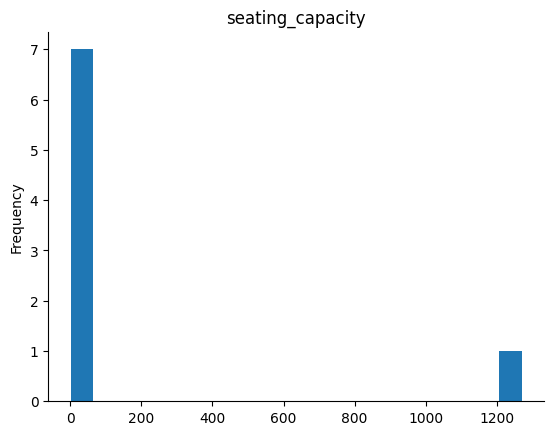

In [41]:
from matplotlib import pyplot as plt
_df_3['seating_capacity'].plot(kind='hist', bins=20, title='seating_capacity')
plt.gca().spines[['top', 'right',]].set_visible(False)

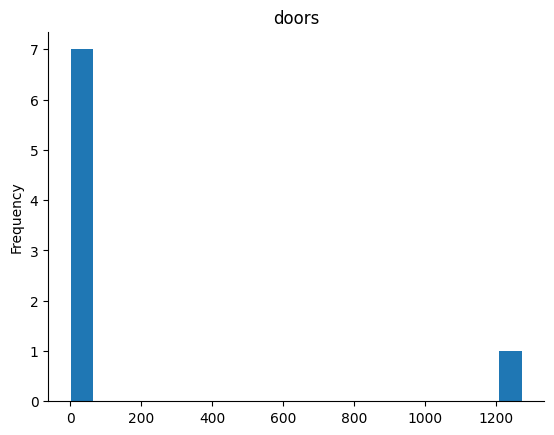

In [40]:
from matplotlib import pyplot as plt
_df_2['doors'].plot(kind='hist', bins=20, title='doors')
plt.gca().spines[['top', 'right',]].set_visible(False)

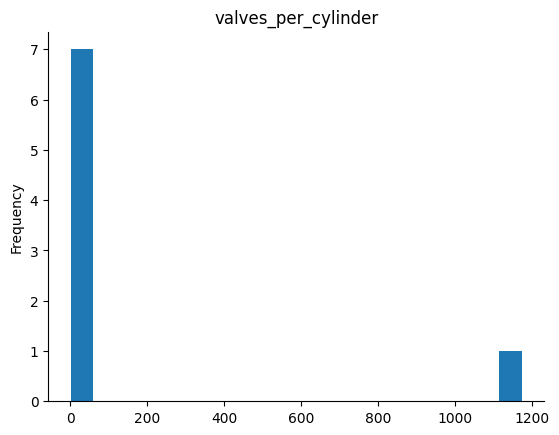

In [39]:
from matplotlib import pyplot as plt
_df_1['valves_per_cylinder'].plot(kind='hist', bins=20, title='valves_per_cylinder')
plt.gca().spines[['top', 'right',]].set_visible(False)

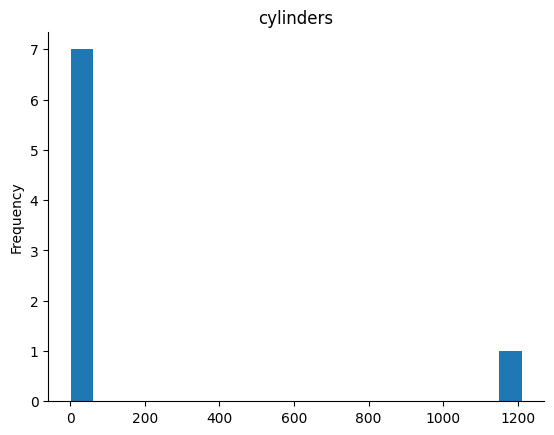

In [38]:
from matplotlib import pyplot as plt
_df_0['cylinders'].plot(kind='hist', bins=20, title='cylinders')
plt.gca().spines[['top', 'right',]].set_visible(False)

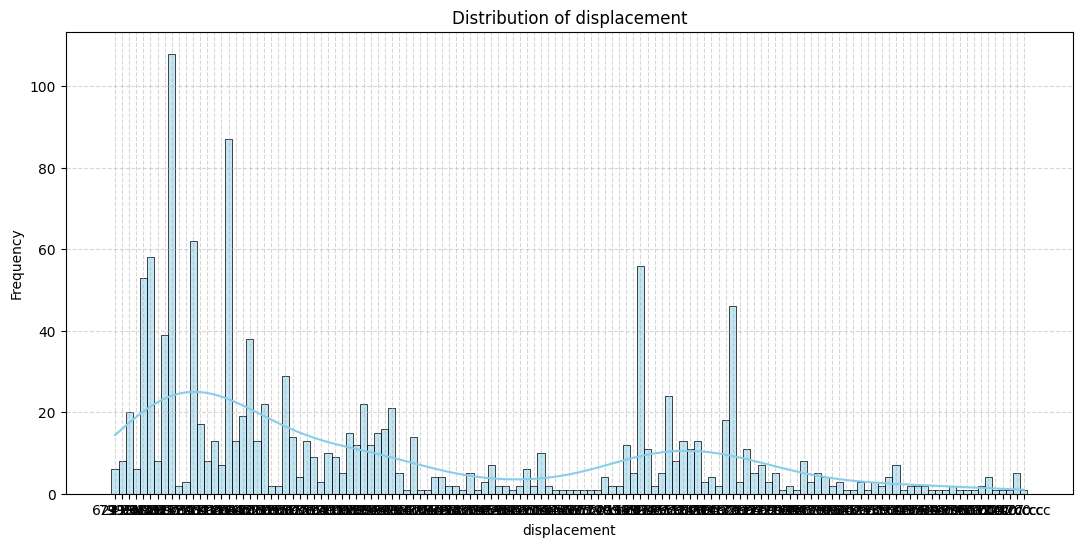

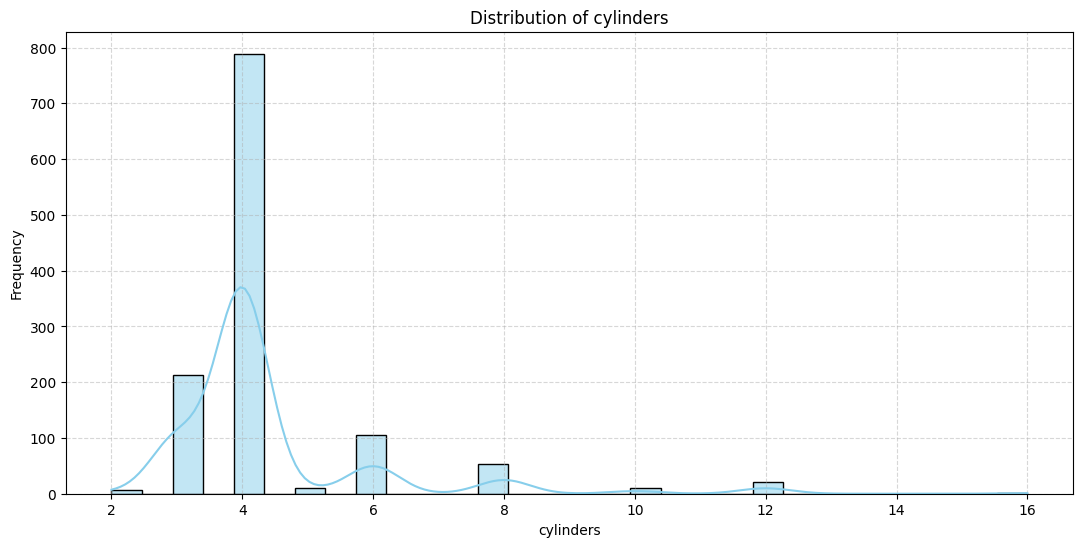

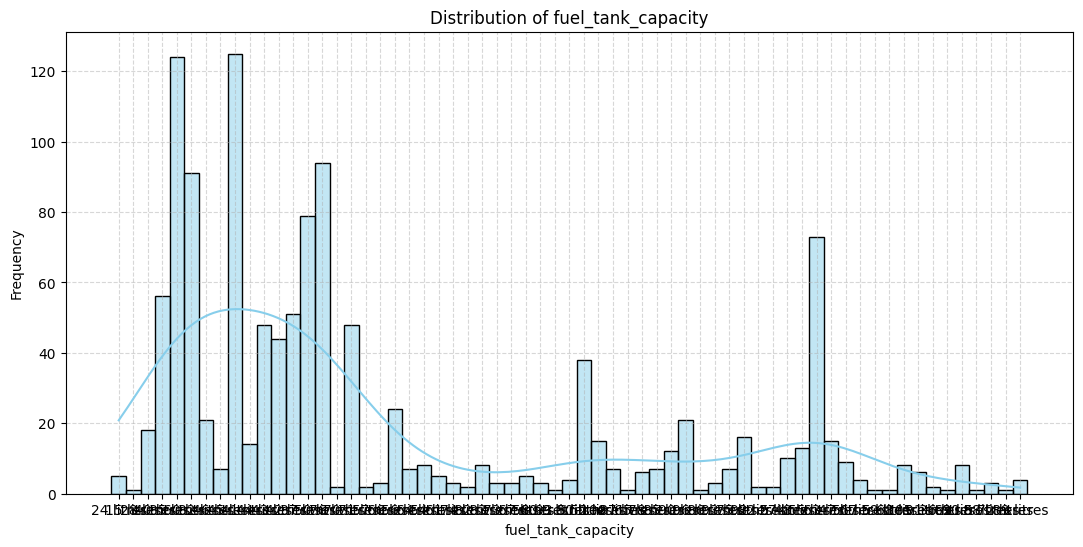

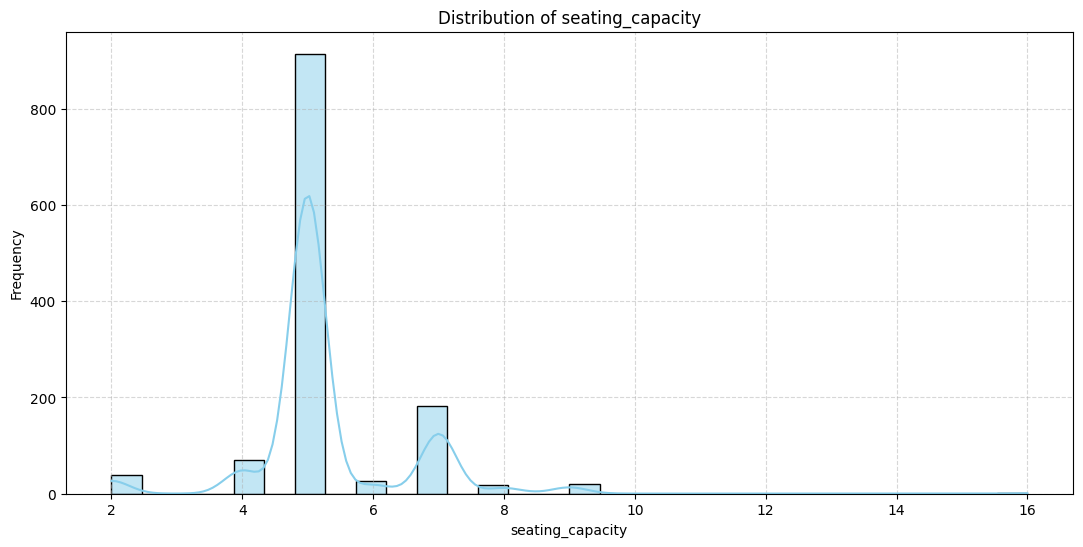

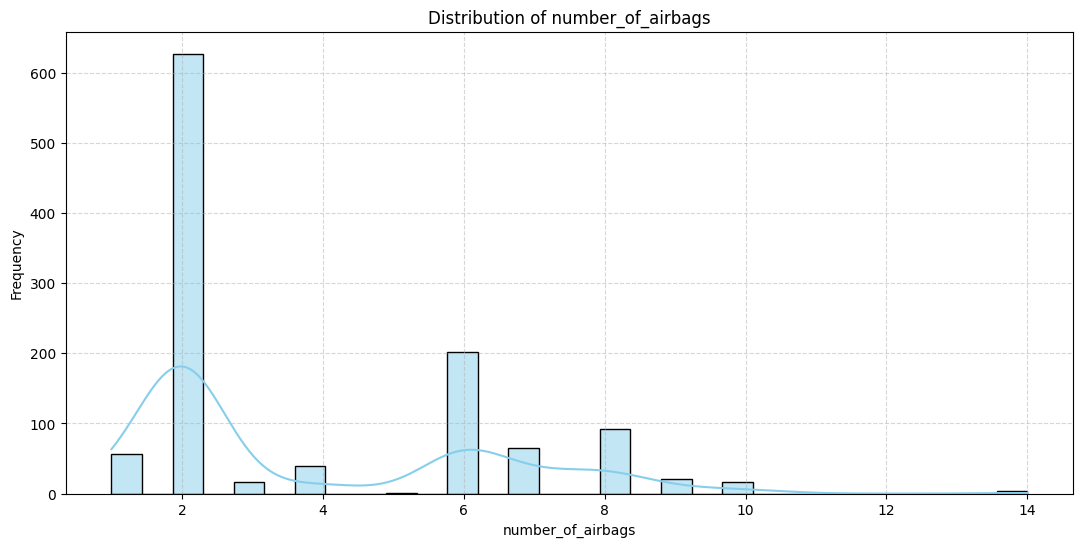

In [29]:
numeric_cols = ['displacement', 'cylinders', 'fuel_tank_capacity', 'seating_capacity', 'number_of_airbags']
for col in numeric_cols:
    plt.figure(figsize=(13, 6))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [30]:
make_counts = df['make'].value_counts()
print("\nFrequency count for make:")
print(make_counts)


Frequency count for make:
Maruti Suzuki       149
Hyundai             130
Mahindra            119
Tata                100
Toyota               82
Honda                64
Skoda                43
Ford                 43
Bmw                  37
Renault              36
Volkswagen           34
Audi                 31
Nissan               29
Jeep                 28
Land Rover Rover     27
Fiat                 23
Jaguar               22
Kia                  21
Volvo                18
Datsun               15
Porsche              14
Maruti Suzuki R      14
Lamborghini          13
Mg                   13
Icml                 11
Land Rover           10
Lexus                10
Mini                 10
Maserati              9
Ferrari               8
Mitsubishi            7
Bentley               6
Premier               6
Force                 6
Isuzu                 5
Aston Martin          3
Bajaj                 2
Bugatti               2
Dc                    1
Name: make, dtype: int64


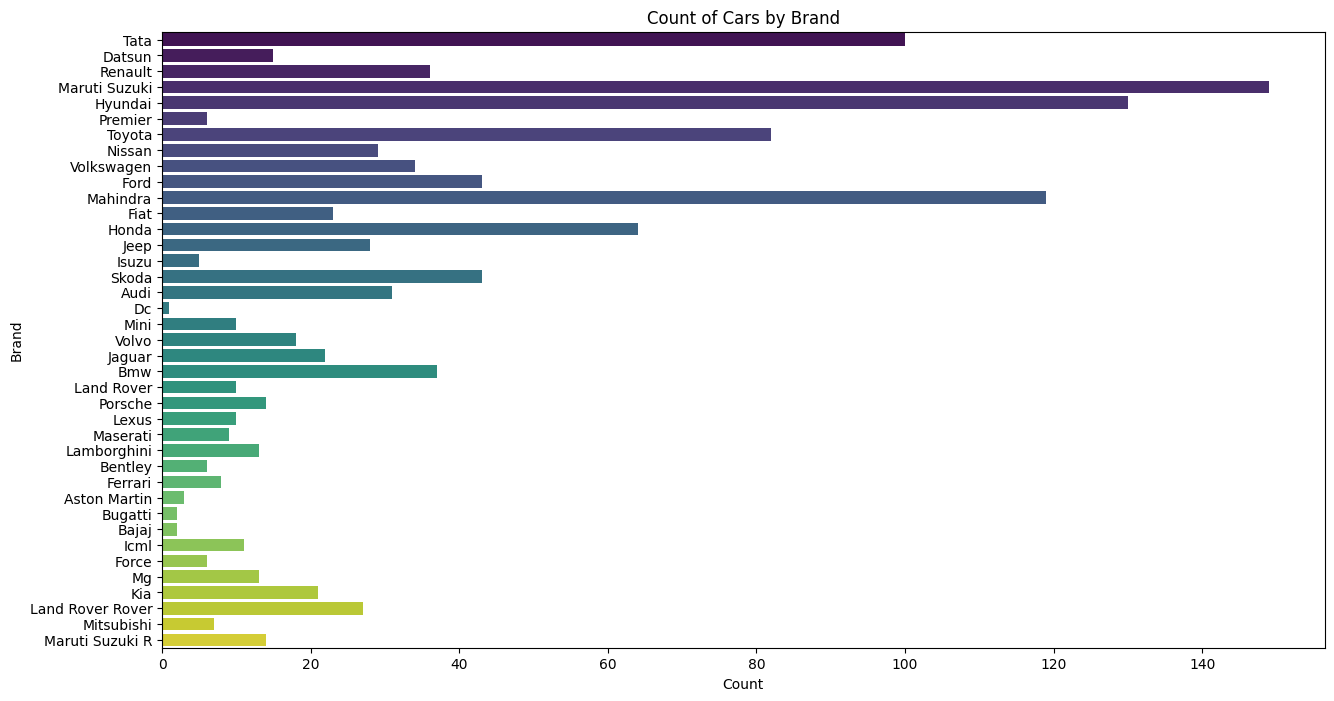

In [31]:
plt.figure(figsize=(15, 8))
sns.countplot(y='make', data=df, palette='viridis')
plt.title('Count of Cars by Brand')
plt.ylabel('Brand')
plt.xlabel('Count')
plt.show()

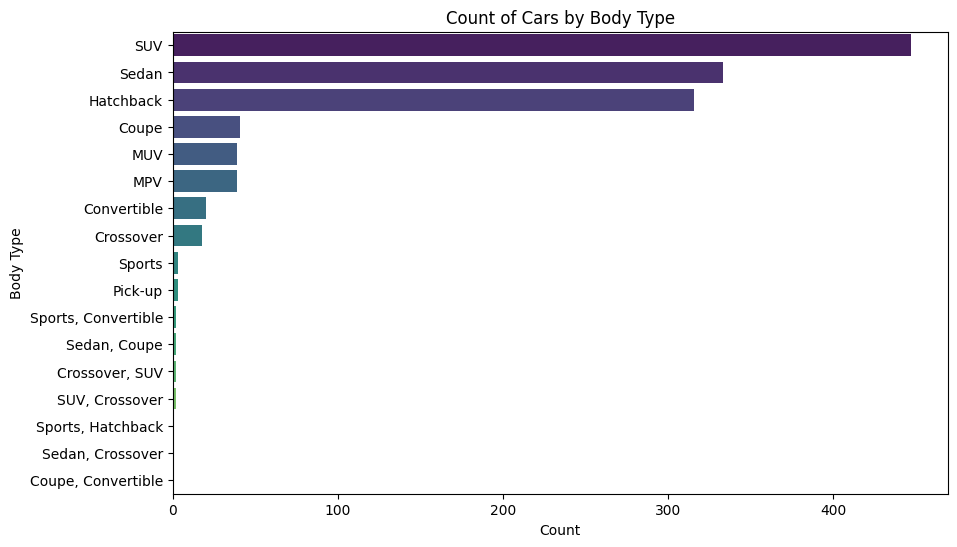

In [32]:
body_type_counts = df['body_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(y='body_type', data=df, palette='viridis', order=body_type_counts.index)
plt.title('Count of Cars by Body Type')
plt.xlabel('Count')
plt.ylabel('Body Type')
plt.show()

**BIVARAITE ANALYSIS**

In [33]:
cross_tab = pd.crosstab(df['fuel_type'], df['navigation_system'])
print("\nCross-tabulation of Fuel Type and Navigation System:")
print(cross_tab)


Cross-tabulation of Fuel Type and Navigation System:
navigation_system  Yes
fuel_type             
CNG                  2
Diesel             323
Electric             7
Hybrid              15
Petrol             336


<Figure size 1000x600 with 0 Axes>

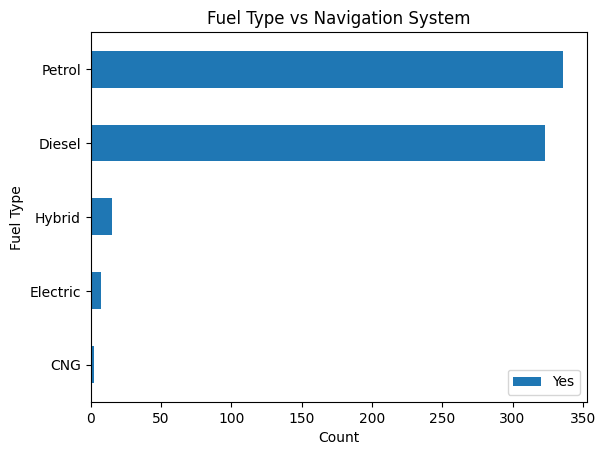

In [34]:
plt.figure(figsize=(10, 6))
cross_tab.sort_values(by='Yes').plot(kind='barh', stacked=True)
plt.title('Fuel Type vs Navigation System')
plt.ylabel('Fuel Type')
plt.xlabel('Count')
plt.legend(loc="lower right")
plt.show()

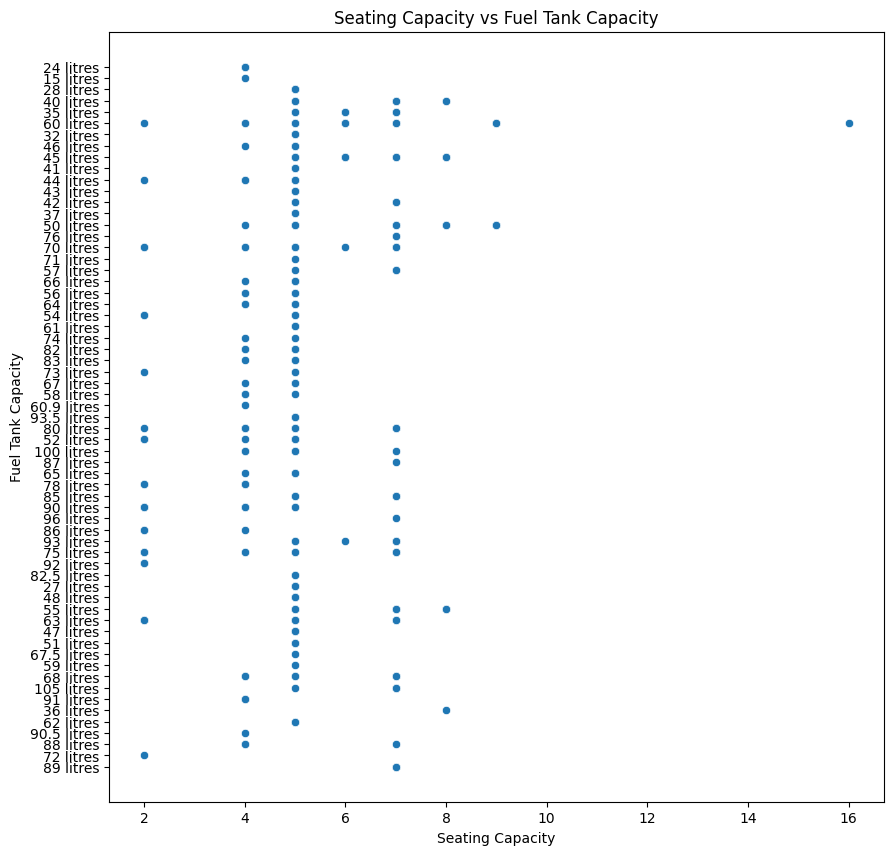

In [35]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='seating_capacity', y='fuel_tank_capacity', data=df)
plt.title('Seating Capacity vs Fuel Tank Capacity')
plt.xlabel('Seating Capacity')
plt.ylabel('Fuel Tank Capacity')
plt.show()

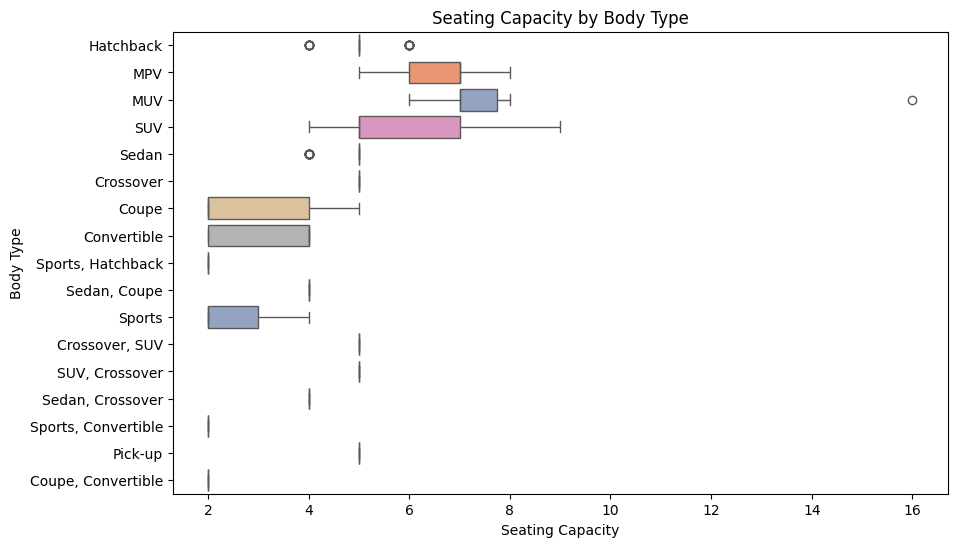

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="seating_capacity", y="body_type", data=df,orient='h', palette='Set2')
plt.title('Seating Capacity by Body Type')
plt.ylabel('Body Type',rotation=90)
plt.xlabel('Seating Capacity')
plt.show()


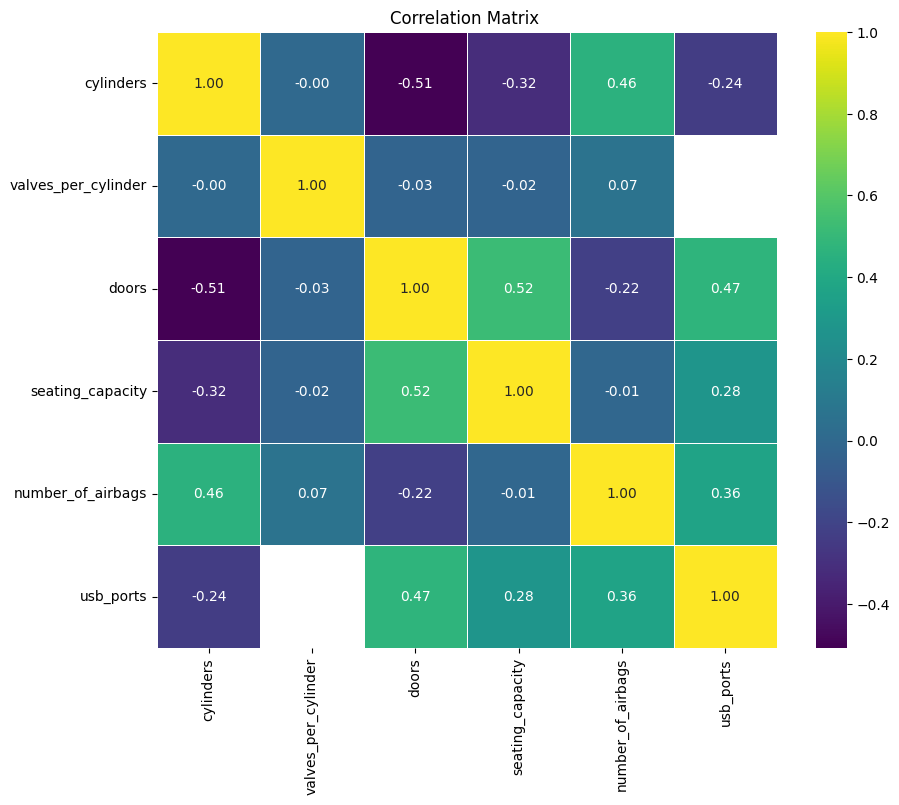

In [37]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix ')
plt.show()